In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as pt

In [3]:
def load_data(image_folder, caption_file):
    image_paths, captions = [], []
    imgs = []
    with open(caption_file, 'r') as f:
        for line in f:
            line = line.strip().split(',')  # 
            image_name, caption = line[0], line[1]
            image_paths.append(os.path.join(image_folder, image_name))
            captions.append(caption)
            img = cv2.imread(os.path.join(image_folder, image_name))
            imgs.append(img)
    return imgs, image_paths, captions

In [11]:
image_folder = r'/Users/saisrithaja/Downloads/Images'  # Folder containing images
caption_file = r"/Users/saisrithaja/Desktop/deep learning/models/captions.txt" # Text file with image-caption pairs
imgs, image_paths, captions = load_data(image_folder, caption_file)

[ WARN:0@172.267] global loadsave.cpp:244 findDecoder imread_('/Users/saisrithaja/Downloads/Images/2160266952_a2ab39191b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@172.267] global loadsave.cpp:244 findDecoder imread_('/Users/saisrithaja/Downloads/Images/2160266952_a2ab39191b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@172.267] global loadsave.cpp:244 findDecoder imread_('/Users/saisrithaja/Downloads/Images/2160266952_a2ab39191b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@172.267] global loadsave.cpp:244 findDecoder imread_('/Users/saisrithaja/Downloads/Images/2160266952_a2ab39191b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@172.267] global loadsave.cpp:244 findDecoder imread_('/Users/saisrithaja/Downloads/Images/2160266952_a2ab39191b.jpg'): can't open/read file: check file path/integrity
[ WARN:0@172.267] global loadsave.cpp:244 findDecoder imread_('/Users/saisrithaja/Downloads/Images/216172386_9ac5356dae.

In [5]:
def build_generator():
    noise_input = layers.Input(shape=(100,))
    text_input = layers.Input(shape=(100,))
    combined = layers.Concatenate()([noise_input, text_input])

    model = Sequential()
    model.add(layers.Dense(8 * 8 * 128, activation="relu"))
    model.add(layers.Conv2DTranspose(3, 4, strides=4, activation="tanh"))

    return model

In [6]:
def build_discriminator():
    image_input = layers.Input(shape=(100,))
    text_input = layers.Input(shape=(100,))
    combined = layers.Concatenate()([image_input, text_input])

    model = Sequential()
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    return model

In [7]:
generator = build_generator()
discriminator = build_discriminator()

In [8]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ ?                      │   0 (unbuilt) │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

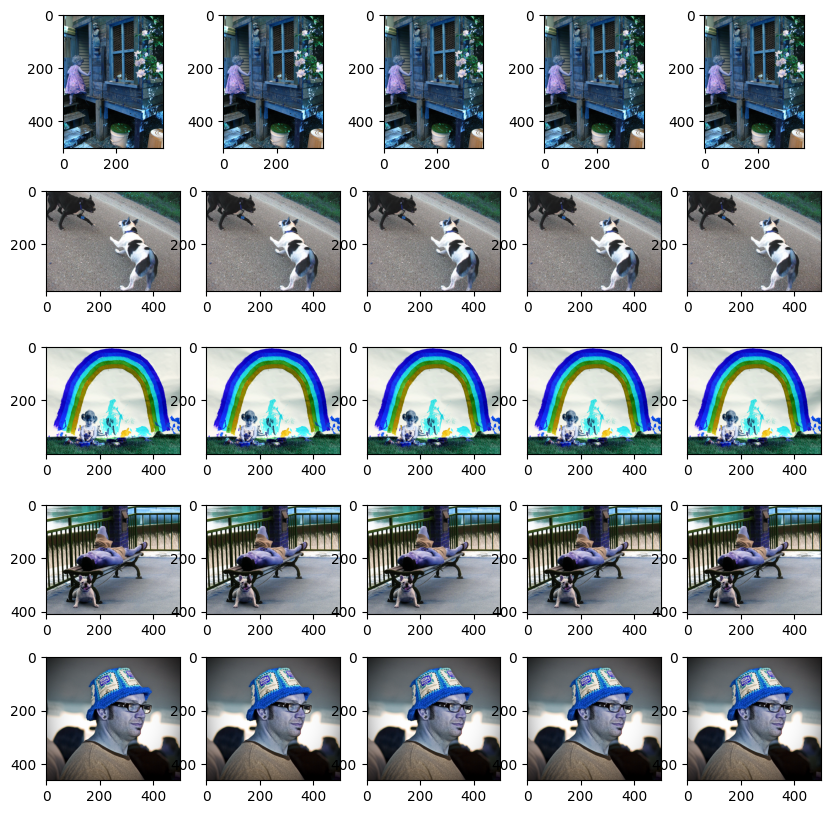

In [10]:
fig = pt.figure(figsize=(10,10))

for i in range(25):
    pt.subplot(5,5,i+1)
    pt.imshow(imgs[i])

In [10]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Conv2DTranspose, Embedding, Flatten, Conv2D, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import numpy as np

# Parameters
img_height, img_width, channels = 64, 64, 3  # For 64x64 images
noise_dim = 100                              # Noise vector dimension
embedding_dim = 256                          # Text embedding dimension

# Step 1: Prepare Embeddings
# Assume pre-trained embeddings, e.g., Word2Vec or GloVe, are loaded as a dictionary
# text_embeddings = load_your_embeddings()

# Text encoder (simplified, can use pretrained RNNs for better results)
def text_encoder(text_input):
    # Convert text input to feature vector (embedding)
    return Dense(embedding_dim)(text_input)

# Generator Model
# Generator Model
def build_generator():
    noise_dim = 100          # Dimension of noise vector
    text_embedding_dim = 256
    noise_input = Input(shape=(noise_dim,), name="noise_input")
    text_input = Input(shape=(text_embedding_dim,), name="text_input")
    
    # Concatenate noise and text embeddings
    combined_input = Concatenate()([noise_input, text_input])
    
    # Dense layer (ensure output shape is as expected)
    x = Dense(256)(combined_input)  # Adjust dimensions here as necessary
    # Continue building the generator layers

    model = Model([noise_input, text_input], x)
    return model

# Ensure that text embeddings are the correct size for the generator



# Discriminator Model
def build_discriminator():
    img_input = tf.keras.Input(shape=(img_height, img_width, channels))
    text_input = tf.keras.Input(shape=(embedding_dim,))

    x = Conv2D(64, (4,4), strides=(2,2), padding="same")(img_input)
    x = LeakyReLU(0.2)(x)
    x = Conv2D(128, (4,4), strides=(2,2), padding="same")(x)
    x = LeakyReLU(0.2)(x)
    x = Flatten()(x)

    # Project text input to match image feature dimension
    text_features = Dense(8 * 8 * 128, activation="relu")(text_input)
    combined_features = tf.keras.layers.Concatenate()([x, text_features])
    combined_features = Dense(1, activation="sigmoid")(combined_features)

    return Model([img_input, text_input], combined_features, name="Discriminator")

# Step 2: Initialize GAN Components
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

# GAN Model
noise_input = tf.keras.Input(shape=(noise_dim,))
text_input = tf.keras.Input(shape=(embedding_dim,))
generated_img = generator([noise_input, text_input])

discriminator.trainable = False
validity = discriminator([generated_img, text_input])

gan = Model([noise_input, text_input], validity)
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

# Training Loop
def train_gan(dataset, text_embeddings, epochs=10000, batch_size=64):
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    
    for epoch in range(epochs):
        # Training the discriminator
        idx = np.random.randint(0, dataset.shape[0], batch_size)
        imgs = dataset[idx]
        texts = np.array([text_embeddings[i] for i in idx])

        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        generated_imgs = generator.predict([noise, texts])

        d_loss_real = discriminator.train_on_batch([imgs, texts], real)
        d_loss_fake = discriminator.train_on_batch([generated_imgs, texts], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Training the generator
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        g_loss = gan.train_on_batch([noise, texts], real)

        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, D Acc: {d_loss[1]*100}%, G Loss: {g_loss}")

def load_image_dataset(image_folder_path, target_size=(64, 64)):
    images = []
    for file in sorted(os.listdir(image_folder_path)):
        if file.endswith(".jpg") or file.endswith(".png"):
            img = load_img(os.path.join(image_folder_path, file), target_size=target_size)
            img_array = img_to_array(img)
            images.append(img_array)
    return np.array(images)


# Load your image and text datasets here
dataset = load_image_dataset("/Users/saisrithaja/Desktop/deep learning/models/Images" )
# Load text embeddings from file
def load_text_embeddings(file_path):
    embeddings = []
    with open(file_path, "r") as f:
        for line in f:
            embedding = np.fromstring(line.strip(), sep=" ")  # Adjust separator if necessary
            embeddings.append(embedding)
    return np.array(embeddings)

text_embeddings = load_text_embeddings("/Users/saisrithaja/Desktop/deep learning/models/captions.txt")

# Check shapes and confirm successful loading
print("Text embeddings shape:", text_embeddings.shape)# Dataset of images
# Corresponding text embeddings

# Start training
train_gan(dataset, text_embeddings)


NameError: name 'Input' is not defined